In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
conn = sqlite3.connect('vendor_analytics.db')

# Fetching vendor summary data
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,description,Brand,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


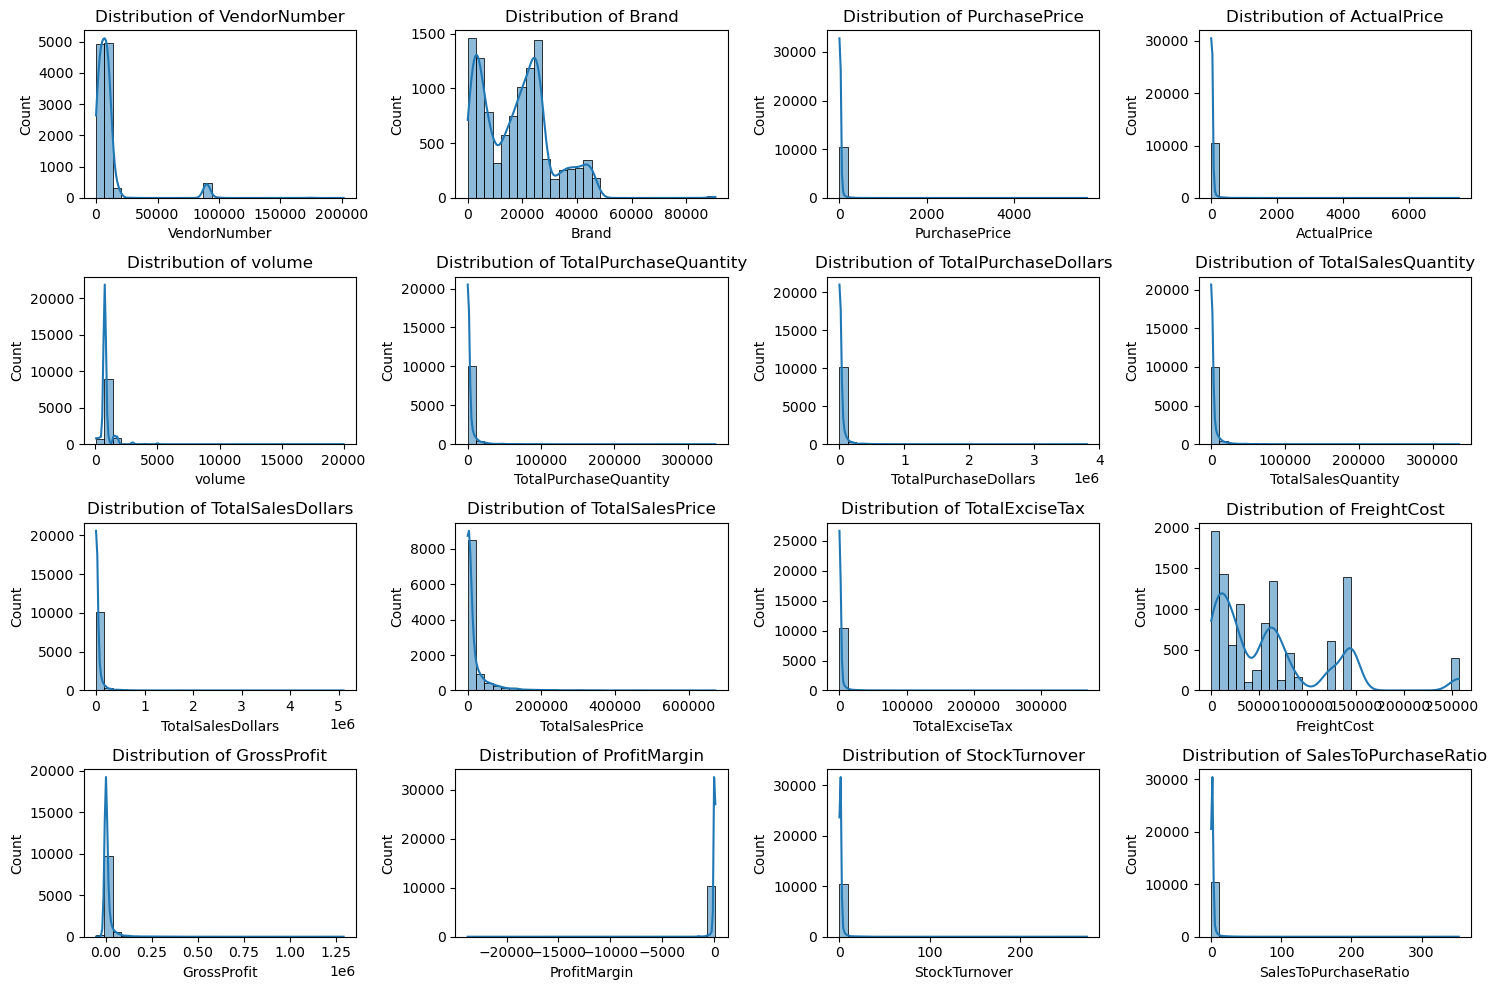

In [4]:
#Distribution Plots for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid size based on number of numerical columns
    sns.histplot(df[col], kde=True,bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

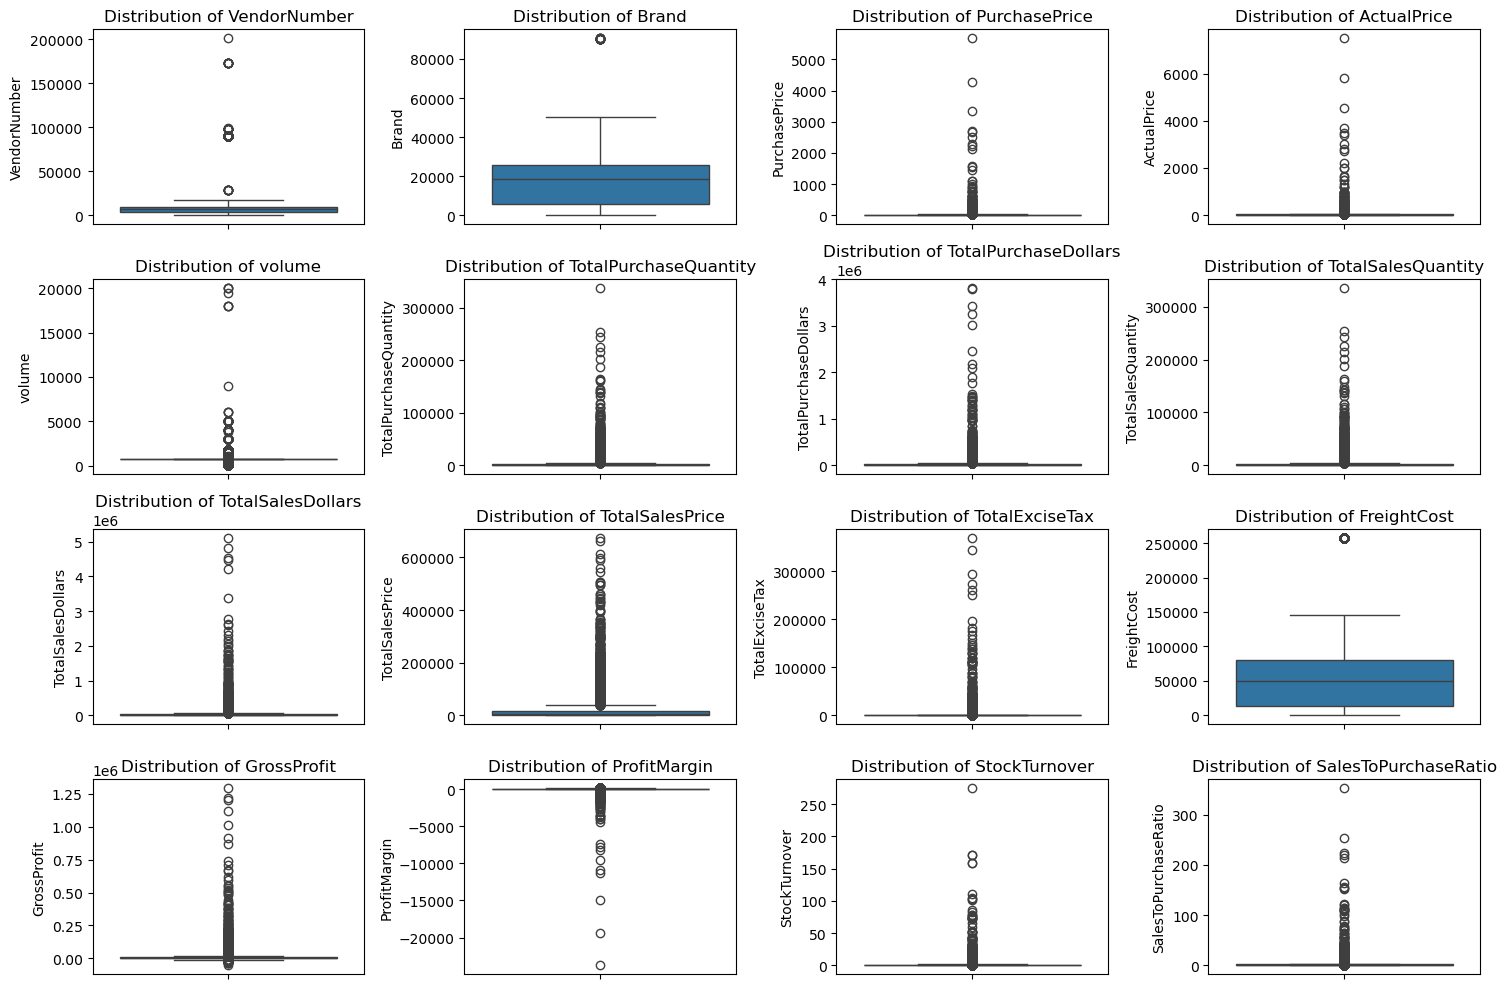

In [5]:
#Distribution Plots for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid size based on number of numerical columns
    sns.boxplot(y=df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [6]:
# Filter the data by removing inconsistent records
df =pd.read_sql_query("""select * 
                      from vendor_sales_summary
                      where GrossProfit > 0
                      and ProfitMargin > 0
                      and TotalSalesQuantity > 0""", conn)

In [7]:
df

,VendorNumber,VendorName,description,Brand,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,8527,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,5683,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,9123,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,6127,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [8]:
# Change column names for better readability
df.rename(columns={'description':'Description', 'volume':'Volume'}, inplace=True)

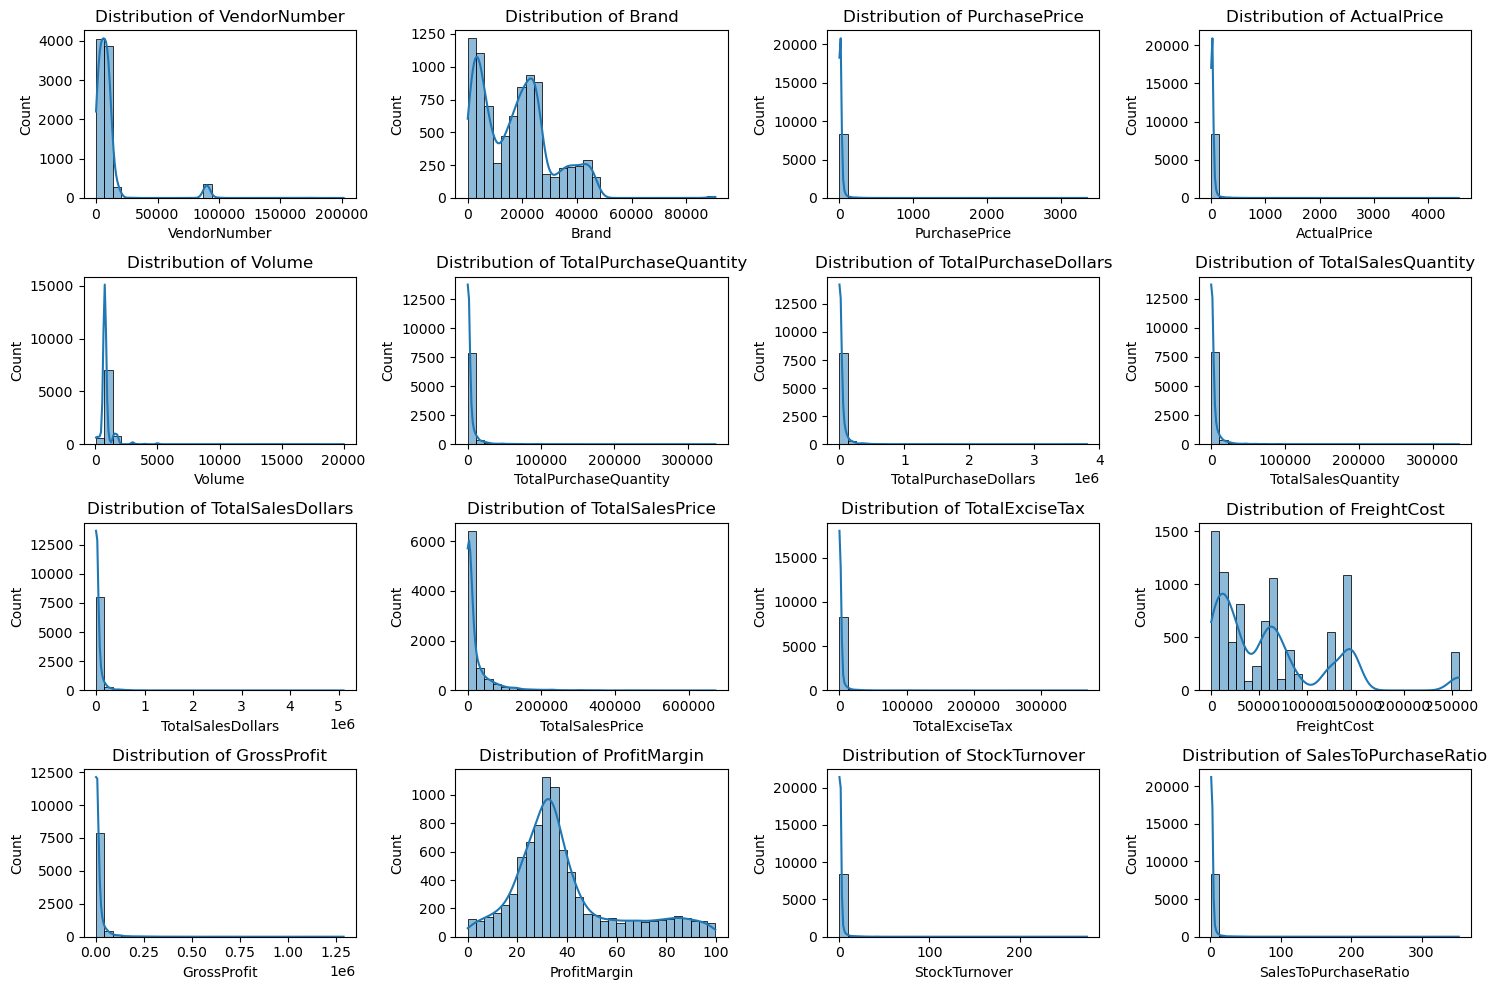

In [9]:
#Distribution Plots for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid size based on number of numerical columns
    sns.histplot(df[col], kde=True,bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

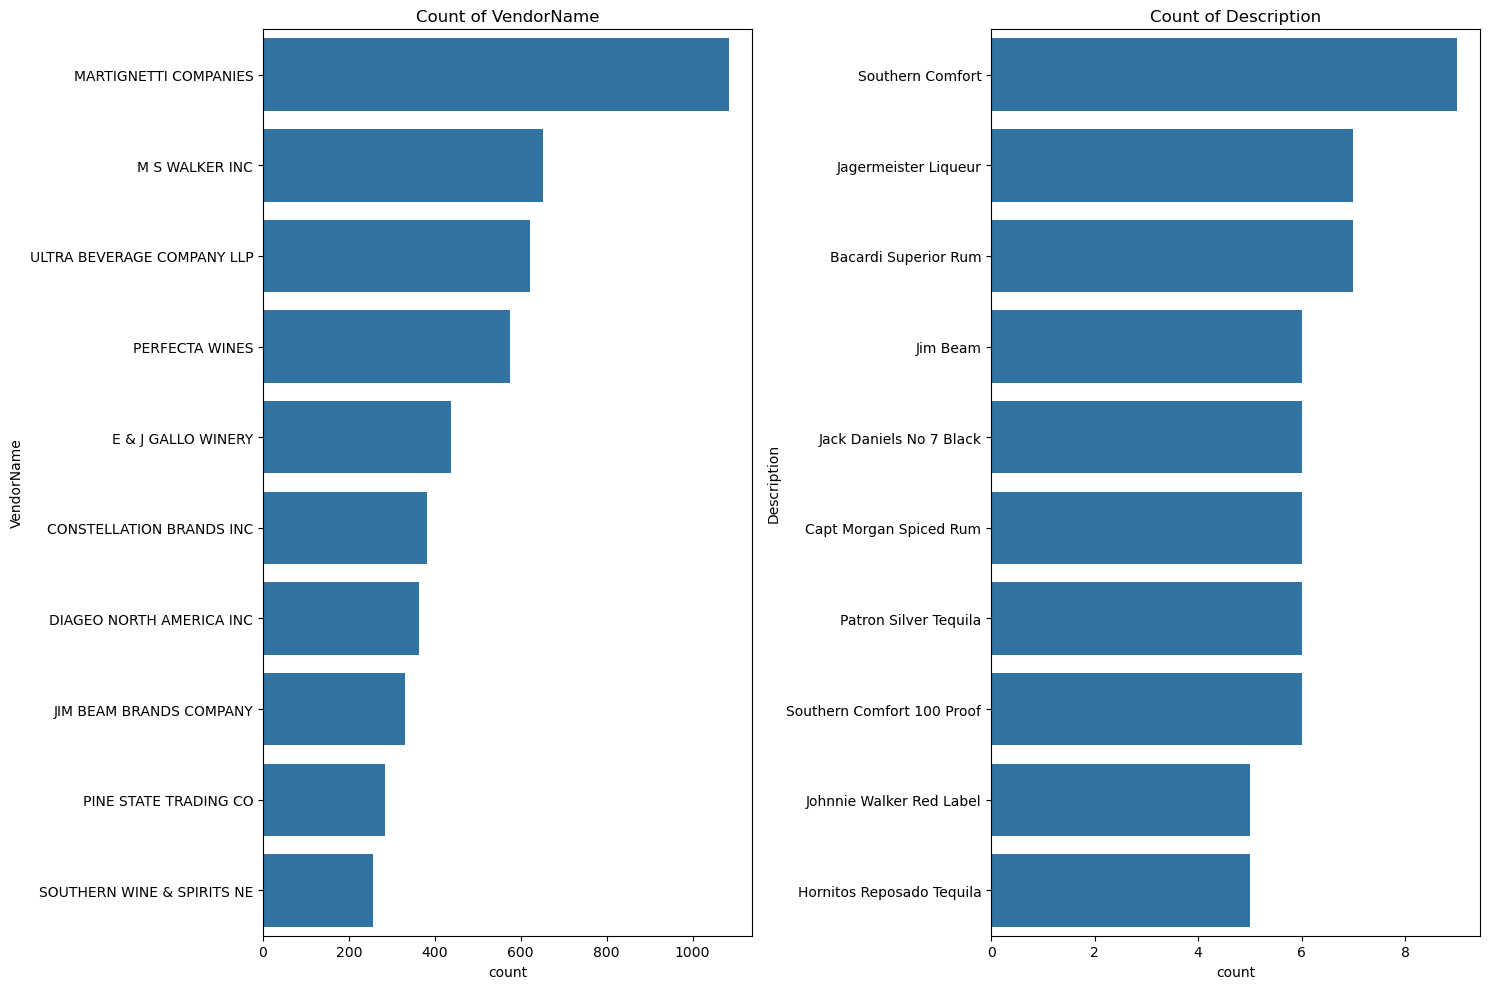

In [10]:
# Count Plots for categorical columns
categorical_cols = ['VendorName','Description'] # Adjust based on actual categorical columns in your dataset

plt.figure(figsize=(15, 10))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10]) # Show top 10 categories
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show() 

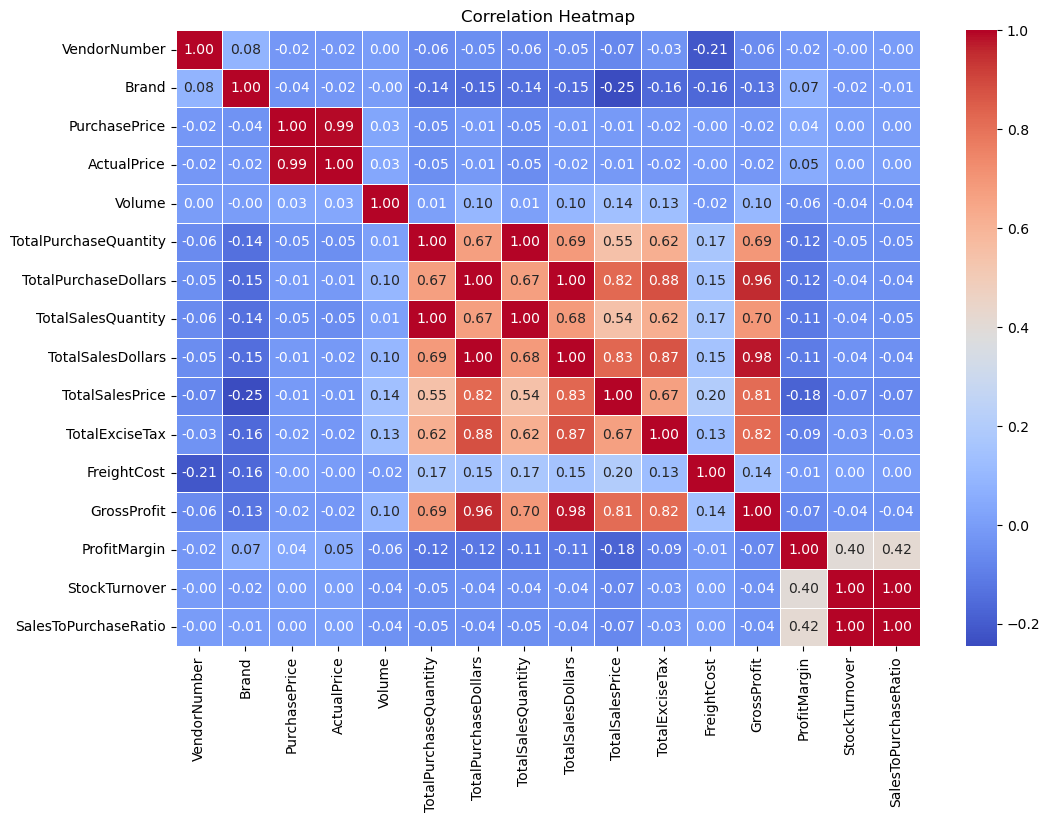

In [11]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Data Analysis

Identifying the brands that need promotional or pricing adjustments

In [12]:
Brand_Performnce=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [13]:
low_sales_threshold = Brand_Performnce['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = Brand_Performnce['ProfitMargin'].quantile(0.85)

In [14]:
low_sales_threshold


np.float64(560.299)

In [15]:
high_margin_threshold

np.float64(64.97017552750113)

In [16]:
#Filter brands based with low sales and high margin thresholds
target_brands = Brand_Performnce[(Brand_Performnce['TotalSalesDollars'] <= low_sales_threshold) & 
                                 (Brand_Performnce['ProfitMargin'] > high_margin_threshold)]
print('Brands with low sales but high profit margin:')
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margin:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [17]:
# For better visualization
Brand_Performnce = Brand_Performnce[Brand_Performnce['TotalSalesDollars'] < 10000]

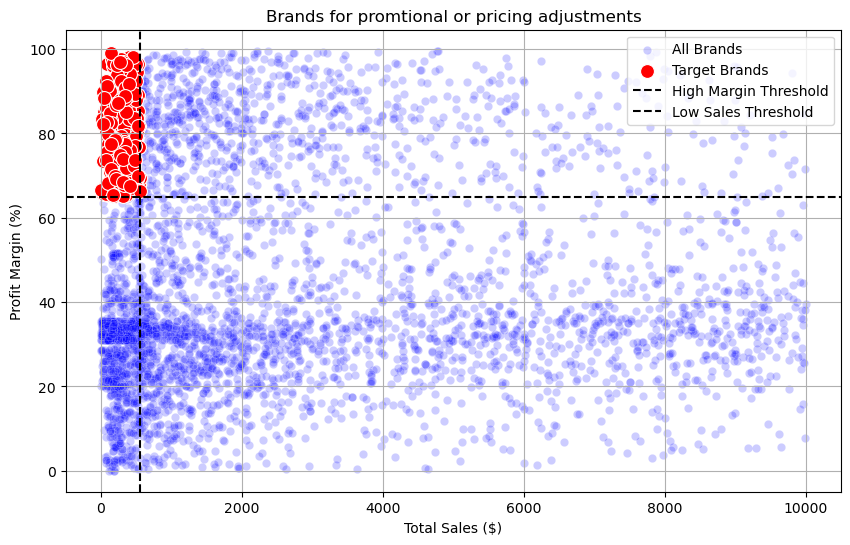

In [18]:
#Scatter plot to visualize brands for promotional or pricing adjustments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Brand_Performnce,x ='TotalSalesDollars',y= 'ProfitMargin', color='blue',label='All Brands',alpha=0.2)
sns.scatterplot(data=target_brands,x ='TotalSalesDollars',y= 'ProfitMargin', color='red',label='Target Brands',s=100)

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')


plt.title('Brands for promtional or pricing adjustments')
plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstrate the highest sales performace?

In [19]:
def format_dollar(value):
    if value >= 1_000_000:
        return f'${value/1_000_000:.2f}M'
    elif value >= 1_000:
        return f'${value/1_000:.2f}K'
    else:
        return f'${value:.2f}'

In [20]:
# Top vendors and brands by sales performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10).reset_index()
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10).reset_index()
print('Top 10 Vendors by Sales:')
display(top_vendors)
print('Top 10 Brands by Sales:')
display(top_brands)

Top 10 Vendors by Sales:


,VendorName,TotalSalesDollars
0,DIAGEO NORTH AMERICA INC,67990099.42
1,MARTIGNETTI COMPANIES,39330359.36
2,PERNOD RICARD USA,32063196.19
3,JIM BEAM BRANDS COMPANY,31423020.46
4,BACARDI USA INC,24854817.14
5,CONSTELLATION BRANDS INC,24218745.65
6,E & J GALLO WINERY,18399899.46
7,BROWN-FORMAN CORP,18247230.65
8,ULTRA BEVERAGE COMPANY LLP,16502544.31
9,M S WALKER INC,14706458.51


Top 10 Brands by Sales:


,Description,TotalSalesDollars
0,Jack Daniels No 7 Black,7964746.76
1,Tito's Handmade Vodka,7399657.58
2,Grey Goose Vodka,7209608.06
3,Capt Morgan Spiced Rum,6356320.62
4,Absolut 80 Proof,6244752.03
5,Jameson Irish Whiskey,5715759.69
6,Ketel One Vodka,5070083.56
7,Baileys Irish Cream,4150122.07
8,Kahlua,3604858.66
9,Tanqueray,3456697.90


In [21]:
top_vendors.apply(lambda x: format_dollar(x['TotalSalesDollars']), axis=1)

0    $67.99M
1    $39.33M
2    $32.06M
3    $31.42M
4    $24.85M
5    $24.22M
6    $18.40M
7    $18.25M
8    $16.50M
9    $14.71M
dtype: object

In [22]:
top_brands.apply(lambda x: format_dollar(x['TotalSalesDollars']), axis=1)

0    $7.96M
1    $7.40M
2    $7.21M
3    $6.36M
4    $6.24M
5    $5.72M
6    $5.07M
7    $4.15M
8    $3.60M
9    $3.46M
dtype: object

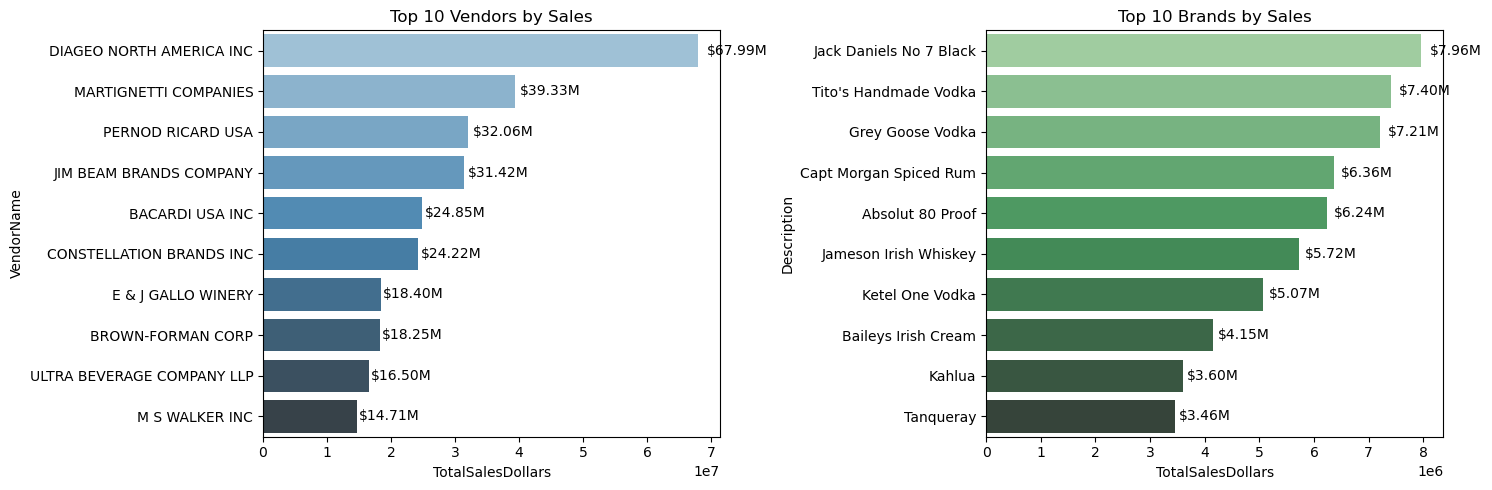

In [23]:
plt.figure(figsize=(15, 5))

# Bar plot for top vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=top_vendors, y='VendorName', x='TotalSalesDollars', palette='Blues_d')
plt.title('Top 10 Vendors by Sales')

for i, bar in enumerate(ax1.patches):
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollar(top_vendors.iloc[i]['TotalSalesDollars']), 
             ha='left', va='center',
             fontsize=10, color='black')

# Bar plot for top brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=top_brands, y='Description', x='TotalSalesDollars', palette='Greens_d')
plt.title('Top 10 Brands by Sales')

for i, bar in enumerate(ax2.patches):
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollar(top_brands.iloc[i]['TotalSalesDollars']), 
             ha='left', va='center',
             fontsize=10, color='black')

plt.tight_layout()
plt.show()

Which Vendors contribute the most total purchase dollars?

In [24]:

vendor_performance = df.groupby('VendorName').agg({
    'TotalSalesDollars':'sum',
    'GrossProfit':'sum',
    'TotalPurchaseDollars':'sum'
}).reset_index()

In [25]:
vendor_performance['PurchaseContribution'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100
vendor_performance

,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars,PurchaseContribution
0,ADAMBA IMPORTS INTL INC,704.53,258.37,446.16,0.000145
1,ALISA CARR BEVERAGES,104470.94,78772.82,25698.12,0.008362
2,ALTAMAR BRANDS LLC,15706.81,4000.61,11706.20,0.003809
3,AMERICAN SPIRITS EXCHANGE,1511.16,577.08,934.08,0.000304
4,AMERICAN VINTAGE BEVERAGE,139603.53,35167.85,104435.68,0.033981
...,...,...,...,...,...
114,WEIN BAUER INC,56217.13,13522.49,42694.64,0.013892
115,WESTERN SPIRITS BEVERAGE CO,405254.83,106837.97,298416.86,0.097097
116,WILLIAM GRANT & SONS INC,7569876.20,1693337.94,5876538.26,1.912074
117,WINE GROUP INC,8304043.28,3100242.11,5203801.17,1.693183


In [26]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution', ascending=False),2)

In [27]:
# Display top 10 vendors by purchase contribution
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollar)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollar)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollar)
 
print('Top 10 Vendors by Purchase Contribution:')
display(top_vendors)


Top 10 Vendors by Purchase Contribution:


,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,$67.99M,$17.89M,$50.10M,16.30
57,MARTIGNETTI COMPANIES,$39.33M,$13.83M,$25.50M,8.30
68,PERNOD RICARD USA,$32.06M,$8.21M,$23.85M,7.76
46,JIM BEAM BRANDS COMPANY,$31.42M,$7.93M,$23.49M,7.64
6,BACARDI USA INC,$24.85M,$7.42M,$17.43M,5.67
20,CONSTELLATION BRANDS INC,$24.22M,$8.95M,$15.27M,4.97
11,BROWN-FORMAN CORP,$18.25M,$5.01M,$13.24M,4.31
30,E & J GALLO WINERY,$18.40M,$6.33M,$12.07M,3.93
106,ULTRA BEVERAGE COMPANY LLP,$16.50M,$5.34M,$11.17M,3.63
53,M S WALKER INC,$14.71M,$4.94M,$9.76M,3.18


In [28]:
top_vendors['CumulativePurchaseContribution'] = top_vendors['PurchaseContribution'].cumsum()
top_vendors

,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars,PurchaseContribution,CumulativePurchaseContribution
25,DIAGEO NORTH AMERICA INC,$67.99M,$17.89M,$50.10M,16.30,16.30
57,MARTIGNETTI COMPANIES,$39.33M,$13.83M,$25.50M,8.30,24.60
68,PERNOD RICARD USA,$32.06M,$8.21M,$23.85M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,$31.42M,$7.93M,$23.49M,7.64,40.00
6,BACARDI USA INC,$24.85M,$7.42M,$17.43M,5.67,45.67
20,CONSTELLATION BRANDS INC,$24.22M,$8.95M,$15.27M,4.97,50.64
11,BROWN-FORMAN CORP,$18.25M,$5.01M,$13.24M,4.31,54.95
30,E & J GALLO WINERY,$18.40M,$6.33M,$12.07M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,$16.50M,$5.34M,$11.17M,3.63,62.51
53,M S WALKER INC,$14.71M,$4.94M,$9.76M,3.18,65.69


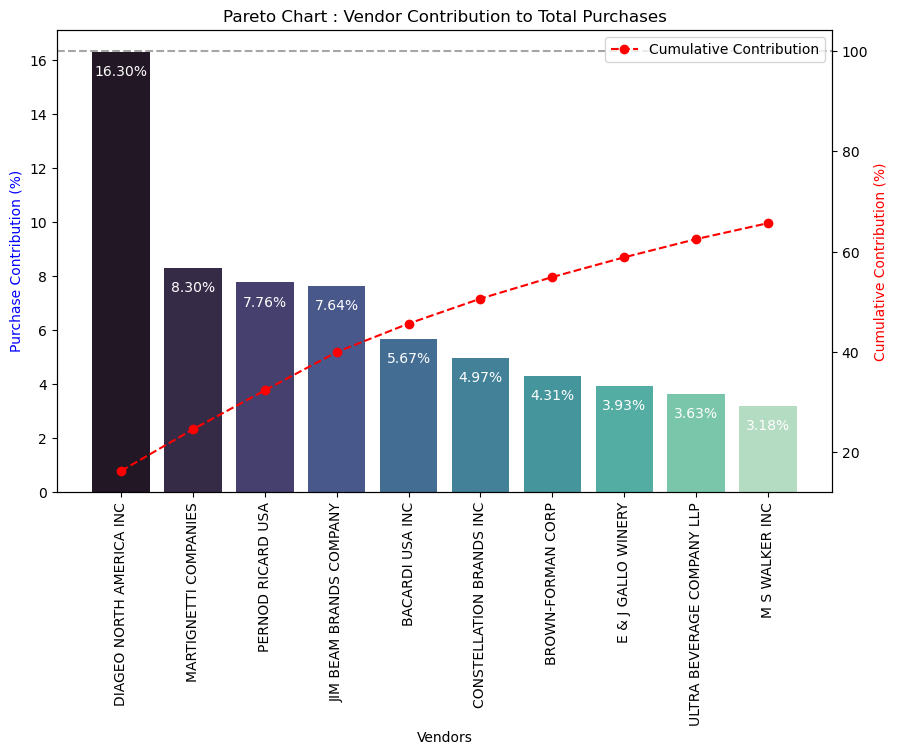

In [29]:
# Pareto chart for purchase contribution
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for purchase contribution
sns.barplot(data=top_vendors, x='VendorName', y='PurchaseContribution',palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution']):
    ax1.text(i, value - 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10, color='white')

# Line Plot for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['CumulativePurchaseContribution'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution (%)', color='blue')
ax2.set_ylabel('Cumulative Contribution (%)', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart : Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='--', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

How much of total procurement is dependent on the top vendors?

In [30]:
print(f'Total Purchase Contribution of Top 10 Vendors: {top_vendors["PurchaseContribution"].sum():.2f}%')

Total Purchase Contribution of Top 10 Vendors: 65.69%


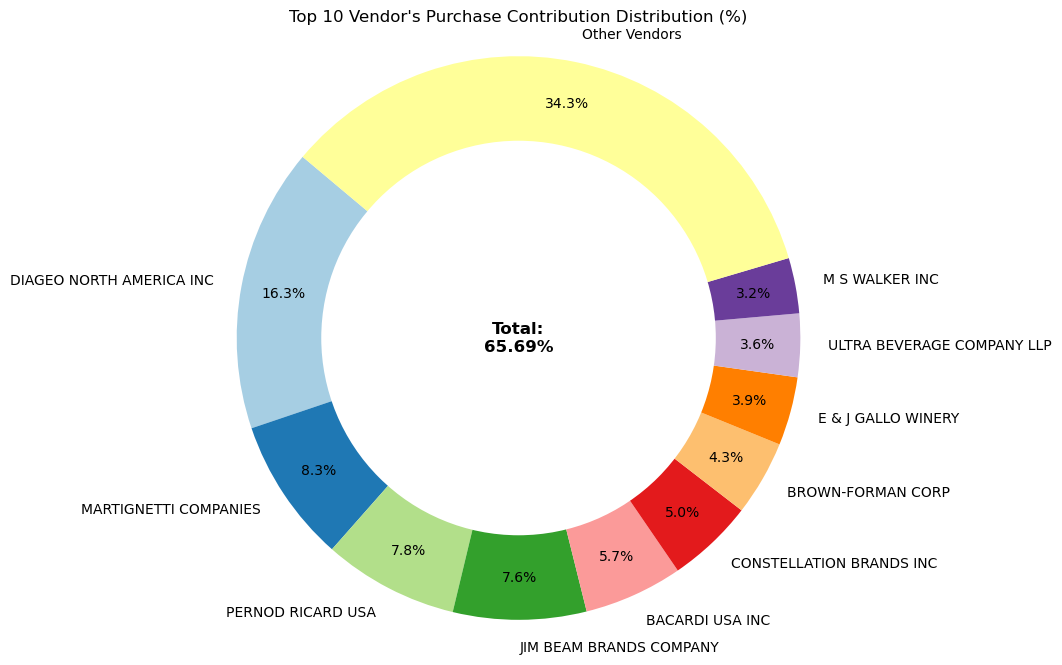

In [31]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

#Append 'Other Vendors' category
vendors.append('Other Vendors')
purchase_contributions.append(remaining_contribution)

# Donut chart for purchase contribution
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%', startangle=140,pctdistance=0.85, colors=plt.cm.Paired.colors[:len(vendors)])   
ax.set_title('Vendor Purchase Contribution Distribution')

# Add a white circle in the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

#Add Total contribution in the center
plt.text(0, 0, f'Total:\n{total_contribution:.2f}%', horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold')

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.title('Top 10 Vendor\'s Purchase Contribution Distribution (%)')
plt.show()

Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [32]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [33]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'])

In [34]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [35]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()

OrderSize
Small     39.068186
Medium    15.486414
Large     10.777625
Name: UnitPurchasePrice, dtype: float64

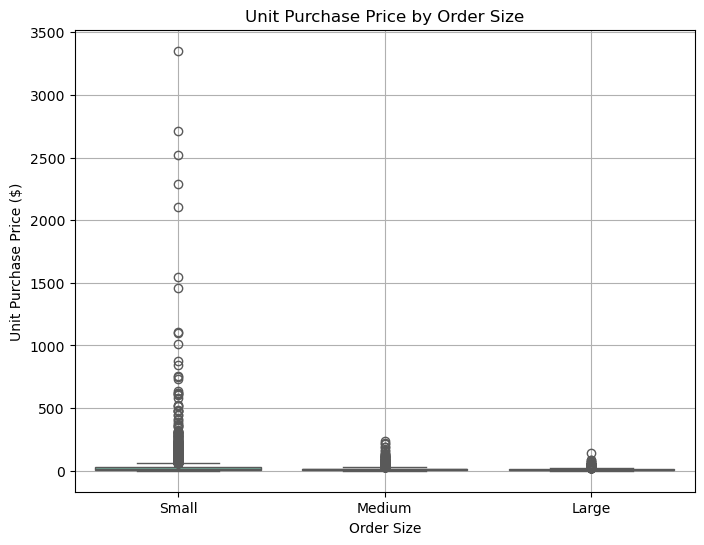

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='OrderSize', y='UnitPurchasePrice', palette='Set2')
plt.title('Unit Purchase Price by Order Size')  
plt.xlabel('Order Size')
plt.ylabel('Unit Purchase Price ($)')
plt.grid(True)
plt.show()

Which vendors have low inventory turnover, indicating excess stock and slow moving products?

In [37]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold inventory per vendor and which vendors contribute the most to it?

In [38]:
# Unsold Inventory Analysis
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'] ) * df['UnitPurchasePrice']
print('Total Unsold Inventory Value:', format_dollar(df['UnsoldInventoryValue'].sum()))

Total Unsold Inventory Value: $2.71M


In [39]:
# Aggregate unsold inventory value by vendor
unsold_inventory_by_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()
unsold_inventory_by_vendor['UnsoldInventoryValue'] = unsold_inventory_by_vendor['UnsoldInventoryValue'].apply(format_dollar)
unsold_inventory_by_vendor.sort_values('UnsoldInventoryValue', ascending=False).head(10)

,VendorName,UnsoldInventoryValue
92,STELLAR IMPORTING CO LLC,$966.88
41,HIGHLAND WINE MERCHANTS LLC,$91.07
109,VINEXTRA INC,$884.38
117,WINE GROUP INC,$86.86K
31,EDRINGTON AMERICAS,$84.03K
15,CANDIA VINEYARDS,$812.13
43,INCREDIBREW INC,$795.80
67,PERFECTA WINES,$791.16
86,SMOKY QUARTZ DISTILLERY LLC,$759.02
25,DIAGEO NORTH AMERICA INC,$722.21K


What is the 95% confidence intervals for profut margins of top pereforming and low performing vendors.

In [40]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)  

In [41]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [42]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [43]:

from scipy import stats
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = sem * t_critical  # For 95% confidence
    return mean ,mean - margin_of_error, mean + margin_of_error

Top Vendors 95% CI: Mean=31.18, Lower=30.74, Upper=31.61
Low Vendors 95% CI: Mean=41.57, Lower=40.50, Upper=42.64


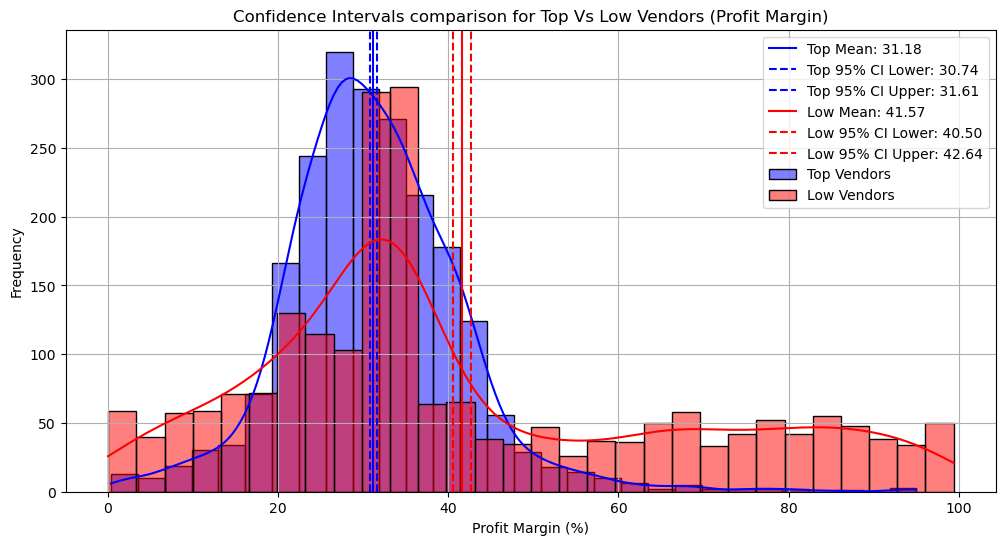

In [44]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f'Top Vendors 95% CI: Mean={top_mean:.2f}, Lower={top_lower:.2f}, Upper={top_upper:.2f}')
print(f'Low Vendors 95% CI: Mean={low_mean:.2f}, Lower={low_lower:.2f}, Upper={low_upper:.2f}')

plt.figure(figsize=(12, 6))

#Top Vendors Plot
sns.histplot(top_vendors, kde=True, color='blue', label='Top Vendors', bins=30, alpha=0.5)
plt.axvline(top_mean, color='blue', linestyle='-', label=f'Top Mean: {top_mean:.2f}')
plt.axvline(top_lower, color='blue', linestyle='--', label=f'Top 95% CI Lower: {top_lower:.2f}')
plt.axvline(top_upper, color='blue', linestyle='--', label=f'Top 95% CI Upper: {top_upper:.2f}')

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color='red', label='Low Vendors', bins=30, alpha=0.5)
plt.axvline(low_mean, color='red', linestyle='-', label=f'Low Mean: {low_mean:.2f}')
plt.axvline(low_lower, color='red', linestyle='--', label=f'Low 95% CI Lower: {low_lower:.2f}')
plt.axvline(low_upper, color='red', linestyle='--', label=f'Low 95% CI Upper: {low_upper:.2f}')

# Finalize the plot
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.title('Confidence Intervals comparison for Top Vs Low Vendors (Profit Margin)')
plt.legend()
plt.grid(True)
plt.show()

Is there a significant difference in profit margins between top and low performing vendors?

H0 (Null Hypothesis): There is no significant difference in profit margins between top and low performing vendors.   

H1 (Alternate Hypothesis): The mean profit margin of top performing vendors is significantly higher than that of low performing vendors.

In [45]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Perform two sample t-test
t_stat, p_value = stats.ttest_ind(top_vendors, low_vendors, equal_var=False)  # Use Welch's t-test for unequal variances
print(f'Two Sample T-Test Results: t-statistic={t_stat:.4f}, p-value={p_value:.4f}')
if p_value < 0.05:
    print('Reject the null hypothesis: There is a significant difference in profit margins between top and low vendors.')
else:
    print('Fail to reject the null hypothesis: No significant difference in profit margins between top and low vendors.')

Two Sample T-Test Results: t-statistic=-17.6695, p-value=0.0000
Reject the null hypothesis: There is a significant difference in profit margins between top and low vendors.


In [46]:
# Export Vendor Sales Summary to CSV
df.to_csv('vendor_sales_summary.csv', index=False)